<a href="https://colab.research.google.com/github/ShyanRoyChoudhury/Data-Analysis-using-Bellabeat-Data/blob/main/bellabeat_data_analysis_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bellabeat : How Can A Wellness Technology Company Play It Smart?**

 ### **STEP 1: ASK**


**Background** Bellabeat is a high-tech manufacturer of beautifully-designed health-focused smart products for women since 2013. Inspiring and empowering women with knowledge about their own health and habits, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for females.

The co-founder and Chief Creative Officer, Urška Sršen is confident that an analysis of non-Bellebeat consumer data (ie. FitBit fitness tracker usage data) would reveal more opportunities for growth.

**Business Task** Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.

**Business Objectives:**
* What are the trends identified?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

**Key Stakeholders:**
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.


### **STEP 2: PREPARE**
**Information on Data Source:**

The data is publicly available on Kaggle: FitBit Fitness Tracker Data and stored in 18 csv files. Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016. 30 FitBit users who consented to the submission of personal tracker data. Data collected includes:
1. physical activity recorded in minutes,
2. heart rate,
3. sleep monitoring,
4. daily activity and
5. steps.

**Limitations of Data Set:**
Data collected from year 2016. Users' daily activity, fitness and sleeping habits,
diet and food consumption may have changed since then, hence data may not be timely or relevant.

Sample size of 30 female FitBit users is not representative of the entire female population. As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.

**Is Data ROCCC?**
A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.

1.  Reliable - LOW - Not reliable as it only has 30 respondents
2.  Original - LOW - Third party provider (Amazon Mechanical Turk)
3.  Comprehensive - MED - Parameters match most of Bellabeat's products' parameters
4.  Current - LOW - Data is 5 years old and is not relevant
5.  Cited - LOW - Data collected from third party, hence unknown
6.  Overall, the dataset is considered bad quality data and it is not recommended to produce business recommendations based on this data.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import warnings
warnings.filterwarnings("ignore")

**Importing datasets**


In [41]:
activity = pd.read_csv("dailyActivity_merged.csv")
calories = pd.read_csv("dailyCalories_merged.csv")
intensities = pd.read_csv("dailyIntensities_merged.csv")
steps = pd.read_csv("dailySteps_merged.csv")
sleep = pd.read_csv("sleepDay_merged.csv")
weight = pd.read_csv("weightLogInfo_merged.csv")
#heartrate = pd.read_csv("heartrate_seconds_merged.csv")



In [42]:
hourly_calories = pd.read_csv("hourlyCalories_merged.csv")
hourly_steps = pd.read_csv("hourlySteps_merged.csv")
hourly_intensities = pd.read_csv("hourlyIntensities_merged.csv")
min_sleep = pd.read_csv("minuteSleep_merged.csv")

### **Step 3 : Process**

**Processing Daily Activty dataset**

In [43]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [44]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [45]:
#converting ActivityDate from object to datetime
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], dayfirst = True)

**Process the Hourly Activity dataset**

In [46]:
hourly_activity = pd.merge(hourly_intensities, hourly_calories, how = 'left', left_on = ['Id','ActivityHour'], right_on = ['Id','ActivityHour'])
hourly_activity = pd.merge(hourly_activity, hourly_steps, how = 'left', left_on = ['Id','ActivityHour'], right_on = ['Id','ActivityHour'])
hourly_activity['ActivityHour'] = pd.to_datetime(hourly_activity['ActivityHour'], dayfirst = True)
hourly_activity['Day'] = hourly_activity['ActivityHour'].dt.day_name()
hourly_activity['Day'] = hourly_activity['Day'].astype('category')
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_activity['Day'].cat.reorder_categories(weekday, inplace = True)
hourly_activity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,Calories,StepTotal,Day
0,1503960366,2016-12-04 00:00:00,20,0.333333,81,373,Sunday
1,1503960366,2016-12-04 01:00:00,8,0.133333,61,160,Sunday
2,1503960366,2016-12-04 02:00:00,7,0.116667,59,151,Sunday
3,1503960366,2016-12-04 03:00:00,0,0.000000,47,0,Sunday
4,1503960366,2016-12-04 04:00:00,0,0.000000,48,0,Sunday


In [47]:
hourly_activity['Id'] = hourly_activity['Id'].astype('category')
hourly_activity['Hour'] = hourly_activity['ActivityHour'].dt.hour
hourly_activity

,Id,ActivityHour,TotalIntensity,AverageIntensity,Calories,StepTotal,Day,Hour
0,1503960366,2016-12-04 00:00:00,20,0.333333,81,373,Sunday,0
1,1503960366,2016-12-04 01:00:00,8,0.133333,61,160,Sunday,1
2,1503960366,2016-12-04 02:00:00,7,0.116667,59,151,Sunday,2
3,1503960366,2016-12-04 03:00:00,0,0.000000,47,0,Sunday,3
4,1503960366,2016-12-04 04:00:00,0,0.000000,48,0,Sunday,4
...,...,...,...,...,...,...,...,...
22094,8877689391,2016-12-05 10:00:00,12,0.200000,126,514,Monday,10
22095,8877689391,2016-12-05 11:00:00,29,0.483333,192,1407,Monday,11
22096,8877689391,2016-12-05 12:00:00,93,1.550000,321,3135,Monday,12
22097,8877689391,2016-12-05 13:00:00,6,0.100000,101,307,Monday,13


**Process Daily Calories dataset**

In [48]:
calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [49]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [50]:
#convering ActivityDate from object to datetime 
calories['ActivityDay'] = pd.to_datetime(calories['ActivityDay'], dayfirst = True)

**Process Hourly Calories dataset**

In [51]:
hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


**Process Daily Intensities dataset**

In [52]:
intensities.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [53]:
intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


In [54]:
#convering ActivityDate from object to datetime 
intensities['ActivityDay'] = pd.to_datetime(intensities['ActivityDay'], dayfirst = True)

**Process Daily Steps dataset**

In [55]:
steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [56]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [57]:
#converting ActivityDay from object to datetime
steps['ActivityDay'] = pd.to_datetime(steps['ActivityDay'], dayfirst = True)

**Daily sleep data`**

In [58]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [59]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [60]:
#Converting Sleepday from object to datetime
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], dayfirst = True)

**Process the weight dataset**

In [61]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [62]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [63]:
#converting Date from object to datetime
weight['Date'] = pd.to_datetime(weight['Date'], dayfirst = True)
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-02-05 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-03-05 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-12-05 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


### **Step 4 : Analyze**

In [66]:
#Number of participants in each datasets
print("Number of participants in activity dataset:"+str(activity['Id'].nunique()))
print("Number of participants in calories dataset:"+str(calories['Id'].nunique()))
print("Number of participants in intensities dataset:"+str(intensities['Id'].nunique()))
print("Number of participants in steps dataset:"+str(steps['Id'].nunique()))
print("Number of participants in sleep dataset:"+str(sleep['Id'].nunique()))
print("Number of participants in weight dataset:"+str(weight['Id'].nunique()))

Number of participants in activity dataset:33
Number of participants in calories dataset:33
Number of participants in intensities dataset:33
Number of participants in steps dataset:33
Number of participants in sleep dataset:24
Number of participants in weight dataset:8


**Activity**

In [67]:
activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [68]:
#Checking rows where calories = 0
activity[activity['Calories'] == 0]


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,2016-12-05,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
653,6290855005,2016-10-05,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
817,8253242879,2016-04-30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
879,8583815059,2016-12-05,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0


In [69]:
#Dropping rows where calories = 0
activity.drop(labels = [30,653,817,879], axis = 0, inplace = True)
#similarly we remove empty rows
empty_rows = list(activity[activity['TotalSteps'] == 0].index) + list(activity[activity['SedentaryMinutes'] == 0].index) + list(activity[activity['TotalDistance'] == 0].index) + list(activity[activity['LightActiveDistance'] == 0].index) 
len(empty_rows)


229

In [70]:
#similarly we remove empty rows
empty_rows = list(activity[activity['TotalSteps'] == 0].index) + list(activity[activity['SedentaryMinutes'] == 0].index) + list(activity[activity['TotalDistance'] == 0].index) + list(activity[activity['LightActiveDistance'] == 0].index) 
activity.drop(labels = empty_rows, axis = 0, inplace = True)

In [71]:
#Checking for duplicate rows
activity[activity.duplicated()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [72]:
#activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], dayfirst = True)
activity['Day'] = activity['ActivityDate'].dt.day_name()
activity['Day'] = activity['ActivityDate'].astype('category')
#weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#activity['Day'].cat.reorder_categories(weekday, inplace = True)
activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day
0,1503960366,2016-12-04,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,2016-12-04
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2016-04-13
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,2016-04-14
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,2016-04-15
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,2016-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-08-05,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,2016-08-05
936,8877689391,2016-09-05,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,2016-09-05
937,8877689391,2016-10-05,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,2016-10-05
938,8877689391,2016-11-05,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,2016-11-05


In [73]:
#Percentage of Women who burn less than average calories


min_calorie_burned = 1800
num_min_calorie = len(list(activity[activity['Calories'] < min_calorie_burned].index))
total_people = len(activity)
print("Percentage of women who burn less than the min average calorie: "+str((num_min_calorie/total_people)*100))

Percentage of women who burn less than the min average calorie: 21.54566744730679


In [74]:
#converting Id of activity to String type
activity['Id'] = activity['Id'].astype(str)
activity.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
Day                               category
dtype: object

**Calories dataset**

In [75]:
calories.dtypes

Id                      int64
ActivityDay    datetime64[ns]
Calories                int64
dtype: object

In [76]:
calories[calories.duplicated()]

,Id,ActivityDay,Calories


In [77]:
#Converting Id of calories to String type
calories['Id'] = calories['Id'].astype(str)
calories.dtypes

Id                     object
ActivityDay    datetime64[ns]
Calories                int64
dtype: object

In [78]:
#removing rows with 0 calories burned on calories dataset
empty_rows = list(calories[calories['Calories'] == 0].index)
calories.drop(labels = empty_rows, axis = 0, inplace = True)

In [79]:
calories['Day'] = calories['ActivityDay'].dt.day_name()
calories['Day'] = calories['Day'].astype('category')
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
calories['Day'].cat.reorder_categories(weekday, inplace= True)
calories

,Id,ActivityDay,Calories,Day
0,1503960366,2016-12-04,1985,Sunday
1,1503960366,2016-04-13,1797,Wednesday
2,1503960366,2016-04-14,1776,Thursday
3,1503960366,2016-04-15,1745,Friday
4,1503960366,2016-04-16,1863,Saturday
...,...,...,...,...
935,8877689391,2016-08-05,2847,Friday
936,8877689391,2016-09-05,3710,Monday
937,8877689391,2016-10-05,2832,Wednesday
938,8877689391,2016-11-05,3832,Saturday


In [80]:
calories.describe()

,Calories
count,936.000000
mean,2313.454060
std,703.683874
min,52.000000
25%,1834.000000
50%,2144.000000
75%,2794.500000
max,4900.000000


**Intensities dataset**

In [81]:
#Converting Id of intensities to String type
intensities['Id'] = intensities['Id'].astype(str)
intensities.dtypes

Id                                  object
ActivityDay                 datetime64[ns]
SedentaryMinutes                     int64
LightlyActiveMinutes                 int64
FairlyActiveMinutes                  int64
VeryActiveMinutes                    int64
SedentaryActiveDistance            float64
LightActiveDistance                float64
ModeratelyActiveDistance           float64
VeryActiveDistance                 float64
dtype: object

In [82]:
intensities[intensities.duplicated()]

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance


In [83]:
intensities.describe()

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681
std,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000
50%,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000
75%,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500
max,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000


In [84]:
empty_rows = list(intensities[intensities['SedentaryMinutes'] == 0].index) + list(intensities[intensities['LightlyActiveMinutes'] == 0].index) 
intensities.drop(labels = empty_rows, axis = 0, inplace = True)


**Steps dataset** 

In [85]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           940 non-null    int64         
 1   ActivityDay  940 non-null    datetime64[ns]
 2   StepTotal    940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


In [86]:
steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,2016-12-04,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669


In [87]:
steps[steps.duplicated()]

,Id,ActivityDay,StepTotal


In [88]:
#Converting the Id from int to String
steps['Id'] = steps['Id'].astype(str)
steps.dtypes

Id                     object
ActivityDay    datetime64[ns]
StepTotal               int64
dtype: object

In [89]:
steps['Day'] = steps['ActivityDay'].dt.day_name()
steps['Day'] = steps['Day'].astype('category')
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
steps['Day'].cat.reorder_categories(weekday, inplace= True)
steps

,Id,ActivityDay,StepTotal,Day
0,1503960366,2016-12-04,13162,Sunday
1,1503960366,2016-04-13,10735,Wednesday
2,1503960366,2016-04-14,10460,Thursday
3,1503960366,2016-04-15,9762,Friday
4,1503960366,2016-04-16,12669,Saturday
...,...,...,...,...
935,8877689391,2016-08-05,10686,Friday
936,8877689391,2016-09-05,20226,Monday
937,8877689391,2016-10-05,10733,Wednesday
938,8877689391,2016-11-05,21420,Saturday


In [90]:
#Percentange of Women who lead an active lifestyle

min_steps = 10000
num_min_steps = len(list(activity[activity['TotalSteps'] > min_steps].index))
print("Percentage of women who take more than 10k steps: " + str((num_min_steps/total_people)*100))

Percentage of women who take more than 10k steps: 35.24590163934426


In [91]:
#Percentange of Women who lead an sedentay lifestyle

min_steps = 5000
num_min_steps = len(list(activity[activity['TotalSteps'] < min_steps].index))
print("Percentage of women who take less than 5k: " + str((num_min_steps/total_people)*100))

Percentage of women who take less than 5k: 25.995316159250585


In [92]:
#Removing rows with 0 steps

empty_rows = list(steps[steps['StepTotal'] == 0].index)
steps.drop(labels = empty_rows, axis = 0, inplace = True)

**Sleep Dataset**

In [93]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [94]:
sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [95]:
#Checking for duplicates
sleep.duplicated().sum()


3

In [96]:
#dropping duplicates
sleep = sleep.drop_duplicates()     


In [97]:
sleep.dtypes

Id                             int64
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

In [98]:
#Converting the Id from int to String
sleep['Id'] = sleep['Id'].astype(str)

sleep['HoursAsleep'] = (sleep['TotalMinutesAsleep']/60).round(2)
sleep['HoursInBed'] = (sleep['TotalTimeInBed']/60).round(2)
sleep['MinutesNotInAsleep'] = (sleep['TotalTimeInBed'] - sleep['TotalMinutesAsleep'])
sleep['PercentAsleep'] = ((sleep['TotalMinutesAsleep']/sleep['TotalTimeInBed'])*100).round(2)
sleep['Day'] = sleep['SleepDay'].dt.day_name()
sleep['Day'] = sleep['Day'].astype('category')
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sleep['Day'].cat.reorder_categories(weekday, inplace= True)
sleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,HoursAsleep,HoursInBed,MinutesNotInAsleep,PercentAsleep,Day
0,1503960366,2016-12-04,1,327,346,5.45,5.77,19,94.51,Sunday
1,1503960366,2016-04-13,2,384,407,6.40,6.78,23,94.35,Wednesday
2,1503960366,2016-04-15,1,412,442,6.87,7.37,30,93.21,Friday
3,1503960366,2016-04-16,2,340,367,5.67,6.12,27,92.64,Saturday
4,1503960366,2016-04-17,1,700,712,11.67,11.87,12,98.31,Sunday
...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360,5.72,6.00,17,95.28,Saturday
409,8792009665,2016-01-05,1,503,527,8.38,8.78,24,95.45,Tuesday
410,8792009665,2016-02-05,1,415,423,6.92,7.05,8,98.11,Friday
411,8792009665,2016-03-05,1,516,545,8.60,9.08,29,94.68,Saturday


**Summary of the findings so far:**
* Average number of participants in each dataset: 27.
* Average sedentary time = 16 hours. This definitely need to be reduced.
* On average, participants sleep only once a day for 7 hours (Still OK).
* 21% of women do not burn enough calories per day(less than 1800 calories).
* 35% of women lead an active lifestyle (>10000 steps per day which is recommended by the Center of Disease Control and prevention (CDC)).
* 25% of women lead an sedentary lifestyle (<5000 steps per day, which is very low).


### **Step 5 : Share**

In [99]:
daily_activity = activity.describe().transpose().round(2)
daily_activity

,count,mean,std,min,25%,50%,75%,max
TotalSteps,854.0,8348.17,4743.36,8.00,4930.00,8056.50,11100.75,36019.00
TotalDistance,854.0,6.00,3.72,0.01,3.38,5.60,7.92,28.03
TrackerDistance,854.0,5.98,3.70,0.01,3.38,5.60,7.89,28.03
LoggedActivitiesDistance,854.0,0.12,0.65,0.00,0.00,0.00,0.00,4.94
VeryActiveDistance,854.0,1.65,2.74,0.00,0.00,0.43,2.29,21.92
ModeratelyActiveDistance,854.0,0.62,0.91,0.00,0.00,0.31,0.87,6.48
LightActiveDistance,854.0,3.68,1.83,0.01,2.37,3.59,4.91,10.71
SedentaryActiveDistance,854.0,0.00,0.01,0.00,0.00,0.00,0.00,0.11
VeryActiveMinutes,854.0,23.26,33.74,0.00,0.00,7.00,36.00,210.00
FairlyActiveMinutes,854.0,14.93,20.48,0.00,0.00,8.00,21.00,143.00


In [100]:
df_activity = daily_activity[8:12]['mean']
df_activity

VeryActiveMinutes        23.26
FairlyActiveMinutes      14.93
LightlyActiveMinutes    212.23
SedentaryMinutes        952.34
Name: mean, dtype: float64

**Lets look at the Activity breakdown**

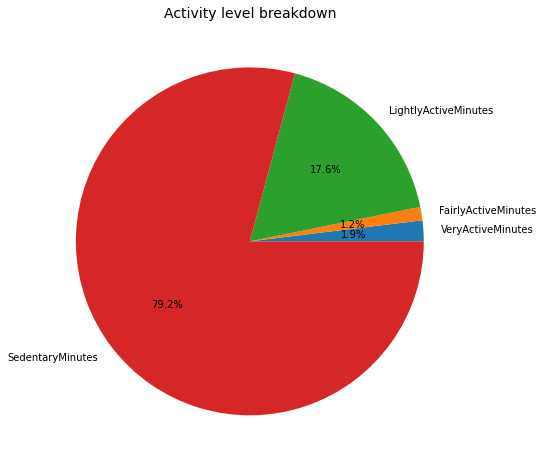

In [101]:
labels = df_activity.keys()
plt.figure(figsize = (8,8))
plt.pie(df_activity, labels = labels, autopct = "%.1f%%")
plt.title("Activity level breakdown", fontsize = 14)
plt.show()

#On an average 79.2% of the time people are sedentary

**How do people's activity vary through the week**


<Figure size 720x576 with 0 Axes>

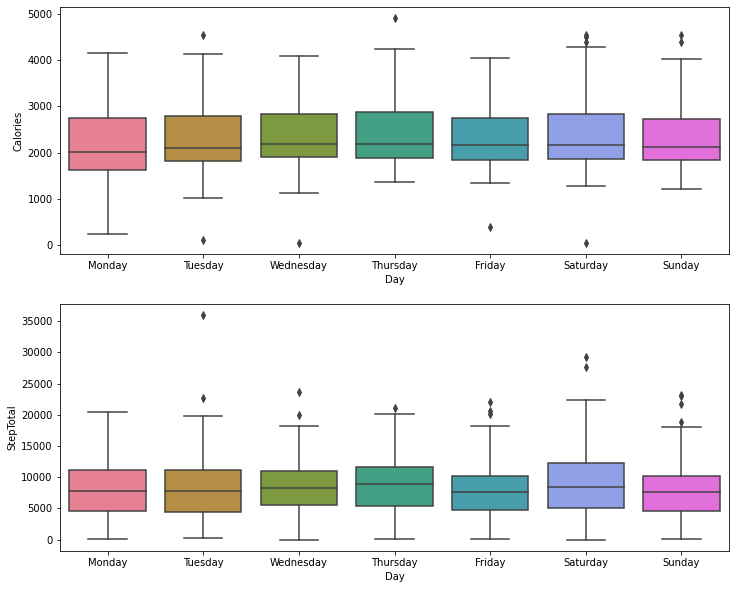

In [102]:
plt.figure(figsize = (10,8))

f, axes = plt.subplots(2, 1, figsize = (12,10))

sns.boxplot(data = calories, x = 'Day', y = 'Calories', ax = axes[0] , palette = 'husl')
sns.boxplot(data = steps, x = 'Day', y = 'StepTotal', ax = axes[1], palette = 'husl')
plt.show()

> 

* **The calories burned do not vary much throughout the week.**
* **The median steps taken throughout the week do not differ much.**

**Calories and steps by the hour**

In [103]:
summary_hourly_activity = hourly_activity.groupby(['Hour']).mean().reset_index().round(2)
summary_hourly_activity.columns = ['Hour','AvgTotalIntensity', 'AvgIntensity', 'AvgCalories', 'AvgSteps']
summary_hourly_activity

,Hour,AvgTotalIntensity,AvgIntensity,AvgCalories,AvgSteps
0,0,2.13,0.04,71.81,42.19
1,1,1.42,0.02,70.17,23.10
2,2,1.04,0.02,69.19,17.11
3,3,0.44,0.01,67.54,6.43
4,4,0.63,0.01,68.26,12.70
5,5,4.95,0.08,81.71,43.87
6,6,7.77,0.13,87.00,178.51
7,7,10.73,0.18,94.48,306.05
8,8,14.67,0.24,103.34,427.54
9,9,15.39,0.26,106.14,433.30


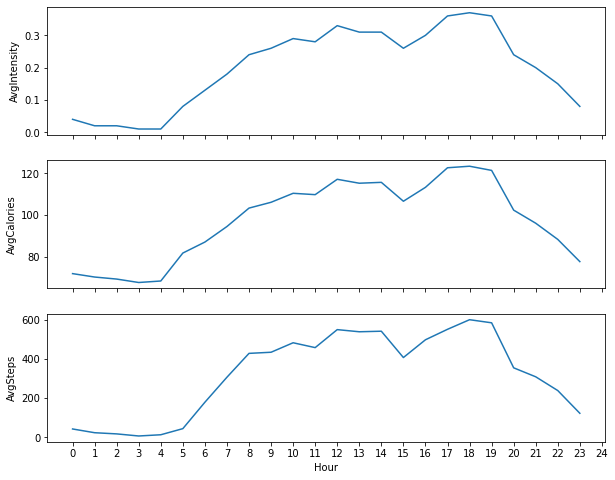

In [104]:
f, axes = plt.subplots(3, 1, figsize = (10,8), sharex = True)
fig_axis = np.arange(0,25)

fig1 = sns.lineplot(data = summary_hourly_activity, x = 'Hour', y = 'AvgIntensity', ax = axes[0])
fig2 = sns.lineplot(data = summary_hourly_activity, x = 'Hour', y = 'AvgCalories', ax = axes[1])
fig3 = sns.lineplot(data = summary_hourly_activity, x = 'Hour', y = 'AvgSteps', ax = axes[2])
fig3.set_xticks(fig_axis)
plt.show()

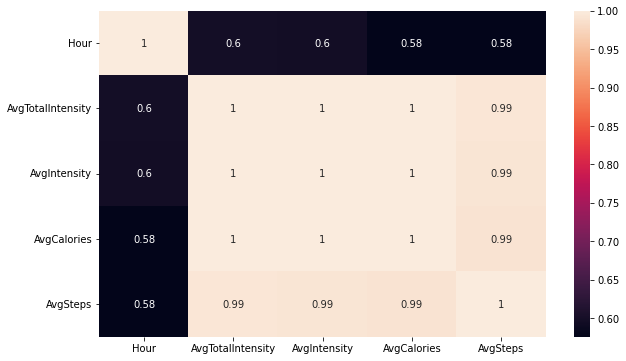

In [105]:
#the plots have very similar shapes, which indicates they are highly correlated
#lets verify the correlation with a heatmap
plt.figure(figsize = (10,6))
sns.heatmap(summary_hourly_activity.corr(), annot = True)
plt.show()

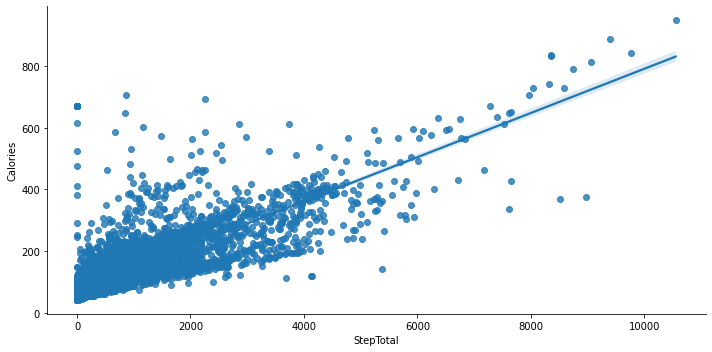

In [106]:
#Just to prove the correlation, we can see here that StepTotal and Calories are positively correlated.

sns.lmplot(data = hourly_activity, x = 'StepTotal', y = 'Calories', aspect = 2)
plt.show()

**Hours of sleep users get in a day**

In [107]:
sleep.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
TotalSleepRecords,410.0,1.12,0.35,1.00,1.00,1.00,1.00,3.00
TotalMinutesAsleep,410.0,419.17,118.64,58.00,361.00,432.50,490.00,796.00
TotalTimeInBed,410.0,458.48,127.46,61.00,403.75,463.00,526.00,961.00
HoursAsleep,410.0,6.99,1.98,0.97,6.02,7.21,8.17,13.27
HoursInBed,410.0,7.64,2.12,1.02,6.73,7.72,8.77,16.02
MinutesNotInAsleep,410.0,39.31,46.71,0.00,17.00,25.50,40.00,371.00
PercentAsleep,410.0,91.65,8.73,49.84,91.18,94.26,96.06,100.00


Text(0, 0.5, 'Number of users')

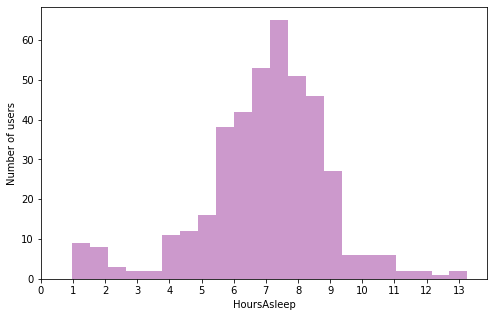

In [108]:
plt.figure(figsize = (8,5))
fig_axis = np.arange(0,14)
fig = sns.distplot(sleep['HoursAsleep'], kde = False, color = 'purple')
fig.set_xticks(fig_axis)
plt.ylabel('Number of users')

**Total time users spend in a bed**

Text(0, 0.5, 'Number of users')

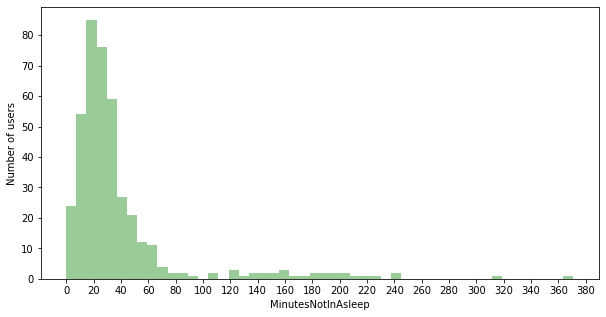

In [109]:
plt.figure(figsize = (10,5))
fig_axis = np.arange(0, 400, 20)
fig = sns.distplot(sleep['MinutesNotInAsleep'], kde = False, color = 'green')
fig.set_xticks(fig_axis)
plt.ylabel('Number of users')

**Do people have different sleep patterns on different day of the week?**

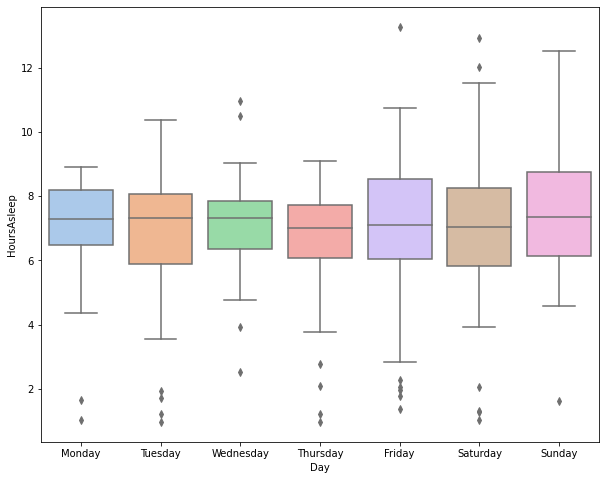

In [110]:
plt.figure(figsize = (10,8))
sns.boxplot(data = sleep, x = 'Day', y = 'HoursAsleep', palette = 'pastel')

# There is a wider variation in sleep time on the weekends.
# Also people spend more time in bed on Sundays.

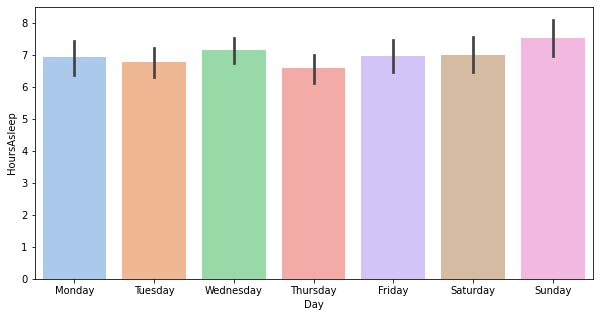

In [111]:
plt.figure(figsize = (10,5))
sns.barplot(data = sleep, x = 'Day', y = 'HoursAsleep', palette = 'pastel')

# On average people get more than 7 hours of sleep on Wednesday and Sunday, and less than 7 on other days.

**Do people regularly wear their Fitbit throughout the day and to monitor their sleep?**

In [112]:
# First we count how many times the user used their Fitbit to record their sleep in the month under review.

sleep_records = sleep.groupby(['Id'])['SleepDay'].count().to_frame().sort_values(by = 'SleepDay', ascending=True)
sleep_records.reset_index(inplace = True)
sleep_records = sleep_records.rename(columns = {'SleepDay' : 'TotalSleepRecords'})
sleep_records.head()

,Id,TotalSleepRecords
0,2320127002,1
1,7007744171,2
2,1844505072,3
3,8053475328,3
4,6775888955,3


In [113]:
# Then we count how many days each user wore their Fitbit throughout the month. 

activity_records = activity.groupby(['Id'])['ActivityDate'].count().to_frame().sort_values(by = 'ActivityDate', ascending=True)
activity_records.reset_index(inplace=True)
activity_records = activity_records.rename(columns = {'ActivityDate':'TotalActivityRecords'})
activity_records.head()

,Id,TotalActivityRecords
0,4057192912,3
1,6775888955,17
2,1927972279,17
3,4020332650,17
4,8253242879,18


In [114]:
#And now we combine the two.

user_records = pd.merge(activity_records, sleep_records, how='outer', left_on=['Id'], right_on = ['Id'])

user_records.head()

,Id,TotalActivityRecords,TotalSleepRecords
0,4057192912,3,NaN
1,6775888955,17,3.0
2,1927972279,17,5.0
3,4020332650,17,8.0
4,8253242879,18,NaN


In [115]:
user_records['TotalSleepRecords'] = user_records['TotalSleepRecords'].fillna(0)
user_records['Id'] = user_records.Id.astype('category')
user_records['TotalSleepRecords'] = user_records.TotalSleepRecords.astype('int')

In [116]:
user_records.sort_values(by='TotalSleepRecords')

#Here we can see that some people do not regularly wear their Fitbit to monitor their sleep.

,Id,TotalActivityRecords,TotalSleepRecords
0,4057192912,3,0
30,1624580081,31,0
29,2022484408,31,0
26,2873212765,31,0
12,8583815059,25,0
11,6290855005,24,0
8,3372868164,20,0
32,8877689391,31,0
4,8253242879,18,0
27,2320127002,31,1


In [117]:
user_records.describe()

# On average a person wears their Fitbit for 28 days, but only in 12 of those days do they monitor their sleep.
# Half of all users record their sleep only 5 times or less throughout the month.

,TotalActivityRecords,TotalSleepRecords
count,33.000000,33.000000
mean,25.878788,12.424242
std,6.725686,12.359284
min,3.000000,0.000000
25%,20.000000,0.000000
50%,30.000000,5.000000
75%,31.000000,26.000000
max,31.000000,31.000000
